In [2]:
# !kaggle competitions download -c tabular-playground-series-aug-2022

In [3]:
# from zipfile import ZipFile

In [4]:
# with ZipFile('./tabular-playground-series-aug-2022.zip', 'r') as zipObj:
#     zipObj.extractall()

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
sns.set_theme()

In [24]:
train_df = pd.read_csv('./train.csv', index_col='id')
train_df.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
id,,,,,,,,,,,,,,,,,,,,,
0,A,80.10,material_7,material_8,9,5,7,8,4,18.040,...,10.672,15.859,17.594,15.193,15.029,NaN,13.034,14.684,764.100,0
1,A,84.89,material_7,material_8,9,5,14,3,3,18.213,...,12.448,17.947,17.915,11.755,14.732,15.425,14.395,15.631,682.057,0
2,A,82.43,material_7,material_8,9,5,12,1,5,18.057,...,12.715,15.607,NaN,13.798,16.711,18.631,14.094,17.946,663.376,0
3,A,101.07,material_7,material_8,9,5,13,2,6,17.295,...,12.471,16.346,18.377,10.020,15.250,15.562,16.154,17.172,826.282,0
4,A,188.06,material_7,material_8,9,5,9,2,8,19.346,...,10.337,17.082,19.932,12.428,16.182,12.760,13.153,16.412,579.885,0


# EDA

In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26570 entries, 0 to 26569
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    26570 non-null  object 
 1   loading         26320 non-null  float64
 2   attribute_0     26570 non-null  object 
 3   attribute_1     26570 non-null  object 
 4   attribute_2     26570 non-null  int64  
 5   attribute_3     26570 non-null  int64  
 6   measurement_0   26570 non-null  int64  
 7   measurement_1   26570 non-null  int64  
 8   measurement_2   26570 non-null  int64  
 9   measurement_3   26189 non-null  float64
 10  measurement_4   26032 non-null  float64
 11  measurement_5   25894 non-null  float64
 12  measurement_6   25774 non-null  float64
 13  measurement_7   25633 non-null  float64
 14  measurement_8   25522 non-null  float64
 15  measurement_9   25343 non-null  float64
 16  measurement_10  25270 non-null  float64
 17  measurement_11  25102 non-null 

In [16]:
train_df.describe(include=np.number)

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17,failure
count,26320.000000,26570.000000,26570.000000,26570.000000,26570.000000,26570.000000,26189.000000,26032.000000,25894.000000,25774.000000,...,25343.000000,25270.000000,25102.000000,24969.000000,24796.000000,24696.000000,24561.000000,24460.000000,24286.000000,26570.000000
mean,127.826233,6.754046,7.240459,7.415883,8.232518,6.256568,17.791528,11.731988,17.127804,17.510759,...,11.430725,16.117711,19.172085,11.702464,15.652904,16.048444,14.995554,16.460727,701.269059,0.212608
std,39.030020,1.471852,1.456493,4.116690,4.199401,3.309109,1.001200,0.996085,0.996414,0.995980,...,0.999137,1.405978,1.520785,1.488838,1.155247,1.491923,1.549226,1.708935,123.304161,0.409160
min,33.160000,5.000000,5.000000,0.000000,0.000000,0.000000,13.968000,8.008000,12.073000,12.715000,...,7.537000,9.323000,12.461000,5.167000,10.890000,9.140000,9.104000,9.701000,196.787000,0.000000
25%,99.987500,6.000000,6.000000,4.000000,5.000000,4.000000,17.117000,11.051000,16.443000,16.839000,...,10.757000,15.209000,18.170000,10.703000,14.890000,15.057000,13.957000,15.268000,618.961500,0.000000
50%,122.390000,6.000000,8.000000,7.000000,8.000000,6.000000,17.787000,11.733000,17.132000,17.516000,...,11.430000,16.127000,19.211500,11.717000,15.628500,16.040000,14.969000,16.436000,701.024500,0.000000
75%,149.152500,8.000000,8.000000,10.000000,11.000000,8.000000,18.469000,12.410000,17.805000,18.178000,...,12.102000,17.025000,20.207000,12.709000,16.374000,17.082000,16.018000,17.628000,784.090250,0.000000
max,385.860000,9.000000,9.000000,29.000000,29.000000,24.000000,21.499000,16.484000,21.425000,21.543000,...,15.412000,22.479000,25.640000,17.663000,22.713000,22.303000,21.626000,24.094000,1312.794000,1.000000


In [17]:
train_df.describe(include=object)

,product_code,attribute_0,attribute_1
count,26570,26570,26570
unique,5,2,3
top,C,material_7,material_8
freq,5765,21320,10865


In [18]:
train_df.shape

(26570, 25)

In [22]:
test_df = pd.read_csv('./test.csv', index_col='id')
test_df.head()

,product_code,loading,attribute_0,attribute_1,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
id,,,,,,,,,,,,,,,,,,,,,
26570,F,119.57,material_5,material_6,6,4,6,9,6,19.305,...,18.654,10.802,15.909,18.070,13.772,13.659,16.825,13.742,17.710,634.612
26571,F,113.51,material_5,material_6,6,4,11,8,0,17.883,...,19.368,12.032,13.998,NaN,12.473,17.468,16.708,14.776,14.102,537.037
26572,F,112.16,material_5,material_6,6,4,8,12,4,18.475,...,17.774,11.743,17.046,18.086,10.907,13.363,15.737,17.065,16.021,658.995
26573,F,112.72,material_5,material_6,6,4,8,11,10,16.518,...,18.948,11.790,18.165,16.163,10.933,15.501,15.667,12.620,16.111,594.301
26574,F,208.00,material_5,material_6,6,4,14,16,8,17.808,...,19.141,12.370,14.578,17.849,11.941,16.070,16.183,13.324,17.150,801.044


In [23]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20775 entries, 26570 to 47344
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_code    20775 non-null  object 
 1   loading         20552 non-null  float64
 2   attribute_0     20775 non-null  object 
 3   attribute_1     20775 non-null  object 
 4   attribute_2     20775 non-null  int64  
 5   attribute_3     20775 non-null  int64  
 6   measurement_0   20775 non-null  int64  
 7   measurement_1   20775 non-null  int64  
 8   measurement_2   20775 non-null  int64  
 9   measurement_3   20446 non-null  float64
 10  measurement_4   20366 non-null  float64
 11  measurement_5   20267 non-null  float64
 12  measurement_6   20151 non-null  float64
 13  measurement_7   20055 non-null  float64
 14  measurement_8   19929 non-null  float64
 15  measurement_9   19871 non-null  float64
 16  measurement_10  19708 non-null  float64
 17  measurement_11  19639 non-n

In [26]:
test_df.describe(include=np.number)

,loading,attribute_2,attribute_3,measurement_0,measurement_1,measurement_2,measurement_3,measurement_4,measurement_5,measurement_6,...,measurement_8,measurement_9,measurement_10,measurement_11,measurement_12,measurement_13,measurement_14,measurement_15,measurement_16,measurement_17
count,20552.000000,20775.000000,20775.000000,20775.000000,20775.000000,20775.000000,20446.000000,20366.000000,20267.000000,20151.000000,...,19929.000000,19871.000000,19708.000000,19639.000000,19535.000000,19472.000000,19335.000000,19233.000000,19097.000000,19035.000000
mean,127.634895,7.733959,6.196823,7.453574,8.962407,6.126931,17.793466,11.727331,17.138080,17.515797,...,19.030765,11.417921,16.123986,18.846571,11.914230,15.736104,16.123958,15.115915,16.636052,701.389816
std,39.154642,1.308535,1.917478,4.274477,4.334200,3.835881,1.002206,1.006834,1.008714,1.000067,...,1.005401,0.999953,1.565414,1.588642,1.363253,1.357019,1.410569,1.545069,1.643463,130.205829
min,37.700000,6.000000,4.000000,0.000000,0.000000,0.000000,13.565000,7.384000,12.215000,13.539000,...,14.885000,7.578000,9.167000,13.127000,6.116000,9.209000,8.415000,8.417000,10.162000,1.671000
25%,99.470000,6.000000,4.000000,4.000000,6.000000,3.000000,17.119000,11.048250,16.457000,16.847000,...,18.351000,10.744000,15.095000,17.714000,11.069000,14.871000,15.238000,14.082000,15.512000,618.723500
50%,122.110000,7.000000,5.000000,7.000000,9.000000,6.000000,17.789000,11.729000,17.132000,17.510000,...,19.040000,11.414000,16.109500,18.810000,11.941000,15.734000,16.119000,15.062000,16.706000,701.379000
75%,148.840000,9.000000,7.000000,10.000000,12.000000,8.000000,18.478000,12.411000,17.824500,18.197000,...,19.707000,12.093000,17.156000,19.967500,12.791000,16.605000,17.001500,16.107000,17.781000,784.872500
max,385.570000,9.000000,9.000000,30.000000,33.000000,28.000000,21.389000,15.623000,21.681000,21.183000,...,23.092000,15.091000,23.354000,24.950000,18.962000,21.677000,23.140000,22.097000,22.270000,1242.786000


In [27]:
test_df.describe(include=object)

,product_code,attribute_0,attribute_1
count,20775,20775,20775
unique,4,2,3
top,F,material_5,material_6
freq,5422,10529,10529


<AxesSubplot:xlabel='failure', ylabel='count'>

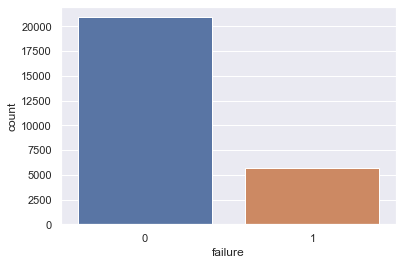

In [30]:
sns.countplot(data=train_df, x='failure')

<AxesSubplot:xlabel='product_code', ylabel='count'>

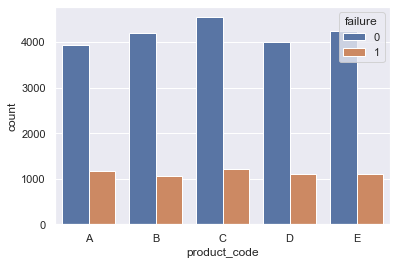

In [32]:
sns.countplot(data=train_df, x='product_code', hue='failure')

<AxesSubplot:xlabel='attribute_0', ylabel='count'>

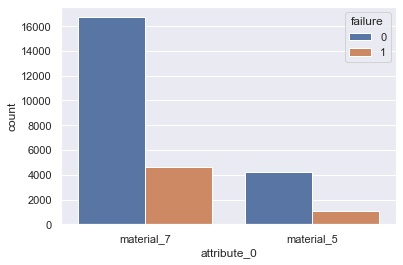

In [33]:
sns.countplot(data=train_df, x='attribute_0', hue='failure')

<AxesSubplot:xlabel='attribute_1', ylabel='count'>

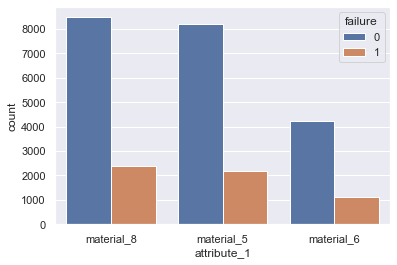

In [34]:
sns.countplot(data=train_df, x='attribute_1', hue='failure')

<AxesSubplot:xlabel='loading', ylabel='Count'>

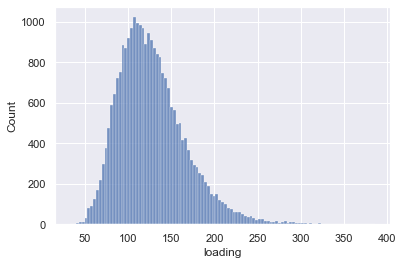

In [113]:
sns.histplot(data=train_df, x='loading')

In [109]:
def plot_feature_distribution(df, nrows=1, ncols=1):
    fig, axes = plt.subplots(nrows, ncols, figsize=(20, 20))
    fig.suptitle('Distribution of features')
    fig.subplots_adjust(hspace=0.25, wspace=0.25)
    cols = train_df.columns[4:-1]
    k = 0
    for i in range(nrows):
        for j in range(ncols):
            sns.histplot(ax=axes[i,j], data=train_df, x=cols[k], kde=True)
            k += 1

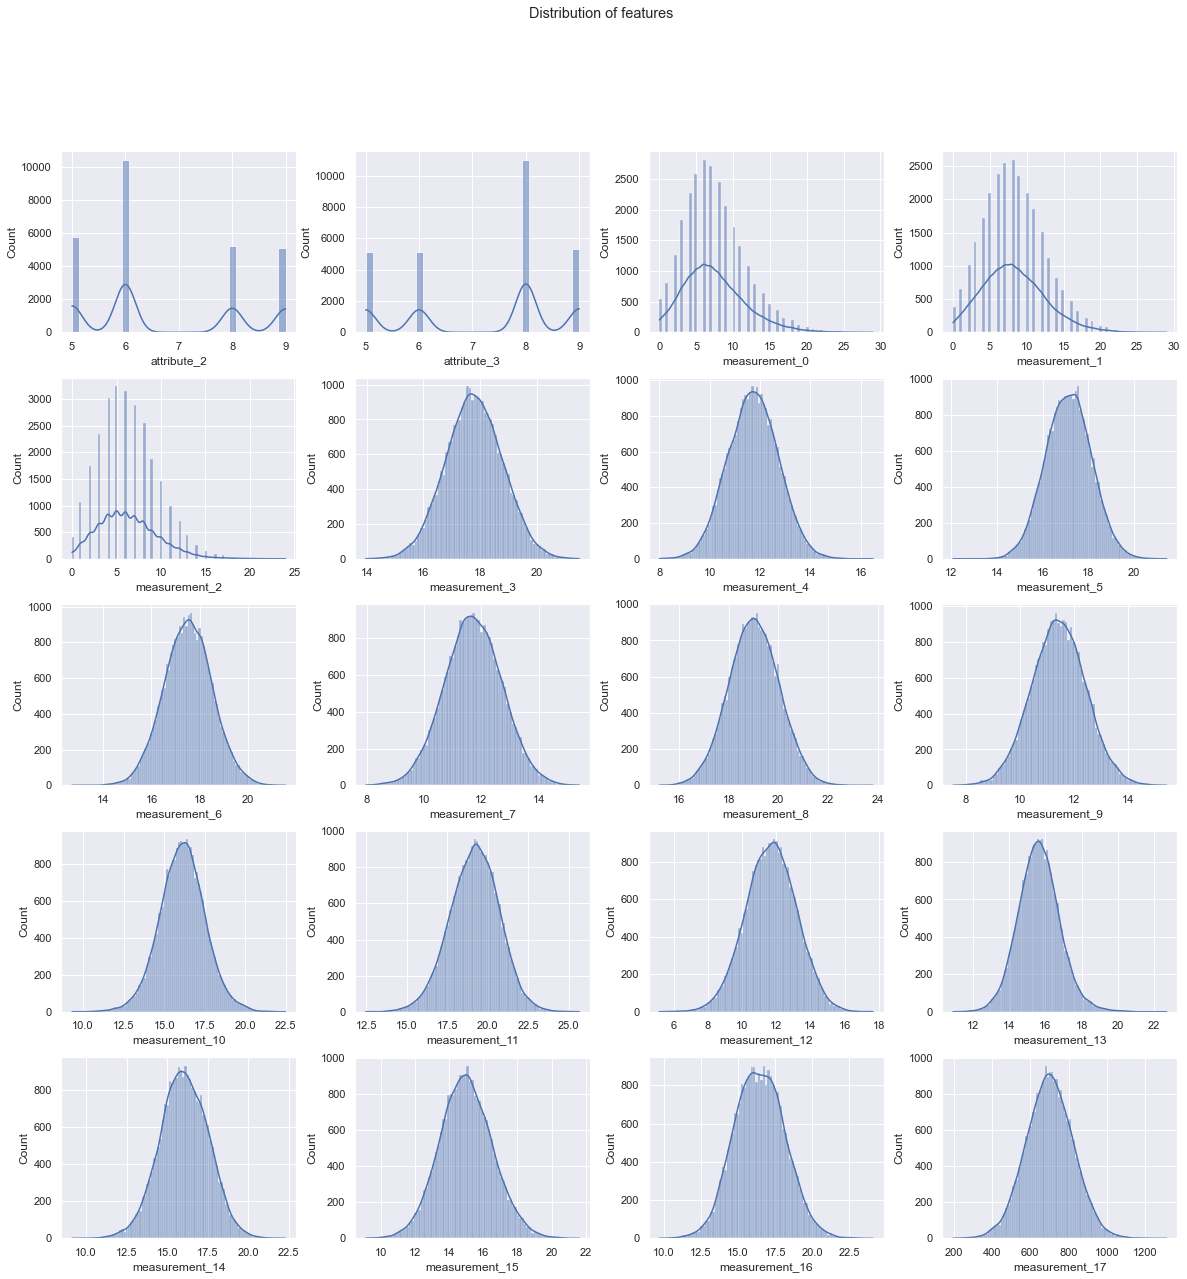

In [110]:
plot_feature_distribution(train_df, nrows=5, ncols=4)

In [114]:
train_df.corr()['failure'].sort_values(ascending=False)

failure           1.000000
loading           0.129089
measurement_17    0.033905
measurement_5     0.018079
measurement_8     0.017119
measurement_7     0.016787
measurement_2     0.015808
measurement_6     0.014791
measurement_0     0.009646
attribute_2       0.006337
measurement_14    0.006211
measurement_12    0.004398
measurement_3     0.003577
measurement_16    0.002237
measurement_10   -0.001515
measurement_13   -0.001831
measurement_15   -0.003544
measurement_9    -0.003587
measurement_11   -0.004801
measurement_4    -0.010488
measurement_1    -0.010810
attribute_3      -0.019222
Name: failure, dtype: float64

<AxesSubplot:>

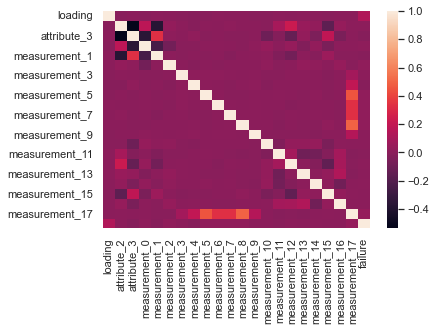

In [111]:
sns.heatmap(train_df.corr())

# EDA results
- There are not high correlation between failure and other features
- Most measurement distributions are similar to the normal distribution

# Data preprocessing and feature engineering

In [ ]:
def preprocess_data(df):
    